### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Himachal Pradesh.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,1920294,1019069,901225
1,1911,1896944,1004183,892761
2,1921,1928206,1020201,908005
3,1931,2029113,1069540,959573
4,1941,2263245,1197620,1065625


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

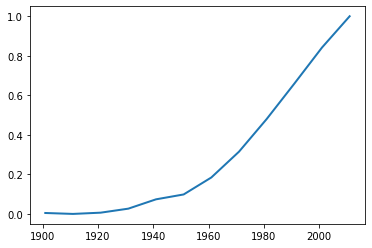

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9875996471213089

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.2605315199279516,
 1.5177660668546764,
 1.7987991188550438,
 2.1036469649904177]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.260532
13,2031,1.517766
14,2041,1.798799
15,2051,2.103647


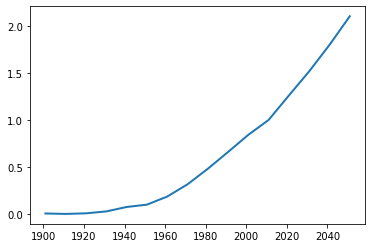

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


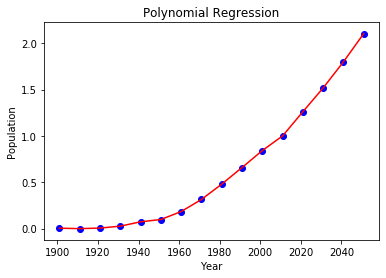

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[1920294.0,
 1896944.0,
 1928206.0,
 2029113.0,
 2263245.0,
 2385981.0,
 2812463.0,
 3460434.0,
 4280818.0,
 5170877.0,
 6077900.0,
 6864602.0,
 8158833.0,
 9436687.0,
 10832763.0,
 12347143.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,1920294.0
1,1911,1896944.0
2,1921,1928206.0
3,1931,2029113.0
4,1941,2263245.0
5,1951,2385981.0
6,1961,2812463.0
7,1971,3460434.0
8,1981,4280818.0
9,1991,5170877.0


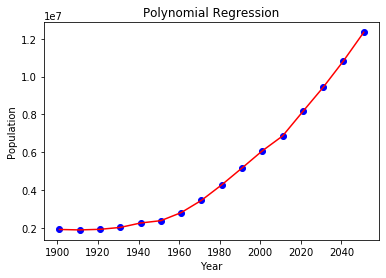

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.006008
1,1911,0.000000
2,1921,0.006465
3,1931,0.026378
4,1941,0.078072
5,1951,0.098335
6,1961,0.180471
7,1971,0.307857
8,1981,0.470498
9,1991,0.651124


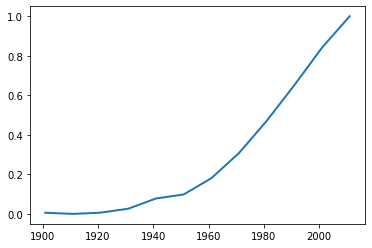

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9963500427448053

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.268951981957251, 1.537168762836437, 1.8330699911008068, 2.1571943901325525]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.006008
1,1911,0.000000
2,1921,0.006465
3,1931,0.026378
4,1941,0.078072
5,1951,0.098335
6,1961,0.180471
7,1971,0.307857
8,1981,0.470498
9,1991,0.651124


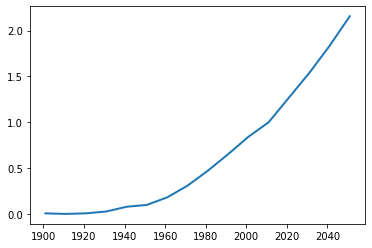

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

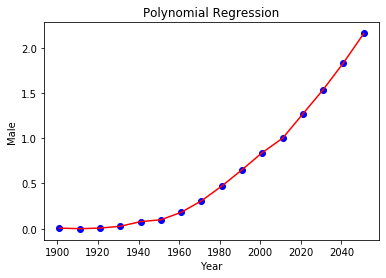

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[1019069.0,
 1004183.0,
 1020201.0,
 1069540.0,
 1197620.0,
 1247826.0,
 1451334.0,
 1766957.0,
 2169931.0,
 2617467.0,
 3087940.0,
 3481873.0,
 4148253.0,
 4812811.0,
 5545962.0,
 6349042.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,1019069.0
1,1911,1004183.0
2,1921,1020201.0
3,1931,1069540.0
4,1941,1197620.0
5,1951,1247826.0
6,1961,1451334.0
7,1971,1766957.0
8,1981,2169931.0
9,1991,2617467.0


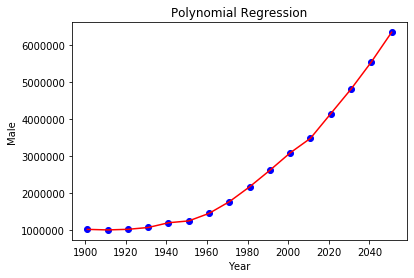

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.003399
1,1911,0.000000
2,1921,0.006122
3,1931,0.026832
4,1941,0.069424


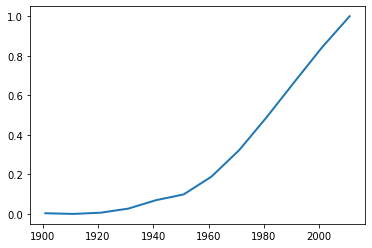

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9826561443863022

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.2521525789823613, 1.4984590451929876, 1.7646972356964739, 2.050363581350723]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.252153
13,2031,1.498459
14,2041,1.764697
15,2051,2.050364


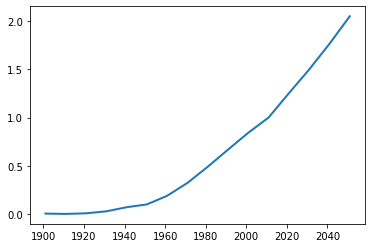

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

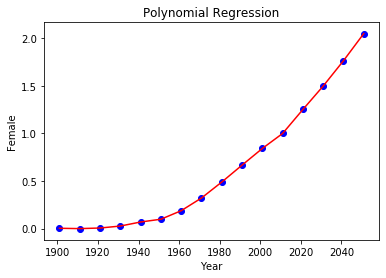

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[901225.0,
 892761.0,
 908005.0,
 959573.0,
 1065625.0,
 1138155.0,
 1361129.0,
 1693477.0,
 2110887.0,
 2553410.0,
 2989960.0,
 3382729.0,
 4010581.0,
 4623876.0,
 5286801.0,
 5998101.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,901225.0
1,1911,892761.0
2,1921,908005.0
3,1931,959573.0
4,1941,1065625.0
5,1951,1138155.0
6,1961,1361129.0
7,1971,1693477.0
8,1981,2110887.0
9,1991,2553410.0


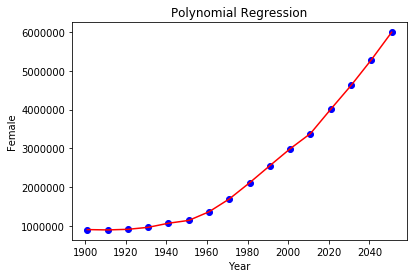

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,1920294.0,1901,1019069.0,1901,901225.0
1,1911,1896944.0,1911,1004183.0,1911,892761.0
2,1921,1928206.0,1921,1020201.0,1921,908005.0
3,1931,2029113.0,1931,1069540.0,1931,959573.0
4,1941,2263245.0,1941,1197620.0,1941,1065625.0
5,1951,2385981.0,1951,1247826.0,1951,1138155.0
6,1961,2812463.0,1961,1451334.0,1961,1361129.0
7,1971,3460434.0,1971,1766957.0,1971,1693477.0
8,1981,4280818.0,1981,2169931.0,1981,2110887.0
9,1991,5170877.0,1991,2617467.0,1991,2553410.0
